This notebook predicts house prices using the California Housing dataset.

**Steps:**

1. Prepared and split the data into train, validation, and test sets.

2. Checked correlations → Median Income has the strongest link with house prices.

3. Built three models:

* Simple Linear Regression (using only income) → R² ≈ 0.45

* Multiple Linear Regression (all features) → R² ≈ 0.59

* Random Forest Regression (all features) → R² ≈ 0.80

**Results**:

* Income is the most important feature.

* Linear models are simple but less accurate.

* Random Forest gives the best predictions.

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
california_ds=fetch_california_housing()
print(california_ds)
df_california=pd.DataFrame(california_ds.data,columns=california_ds.feature_names)
df_california.head()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
target_df=pd.DataFrame(california_ds.target,columns=['MedHouseVal'])
target_df.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [4]:
df_california.columns=california_ds.feature_names


Correlation between features

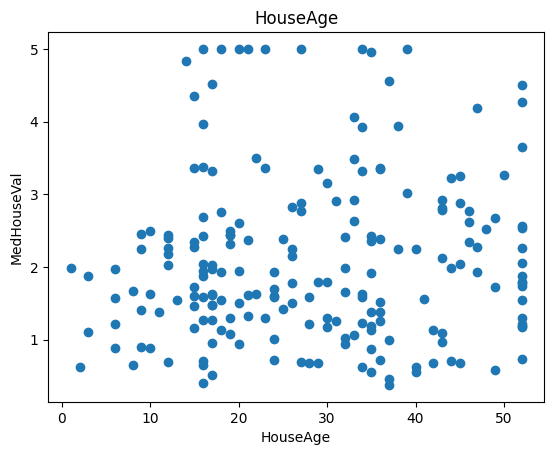

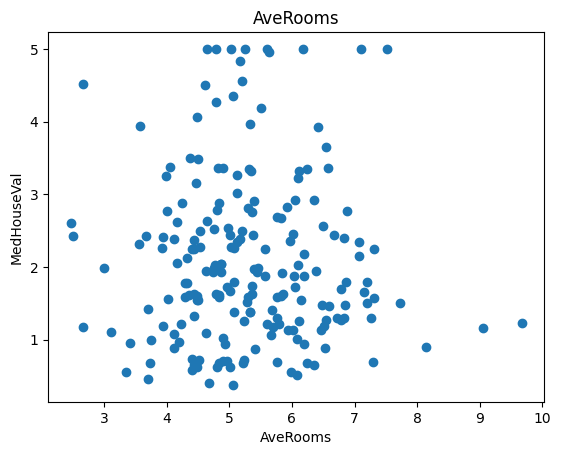

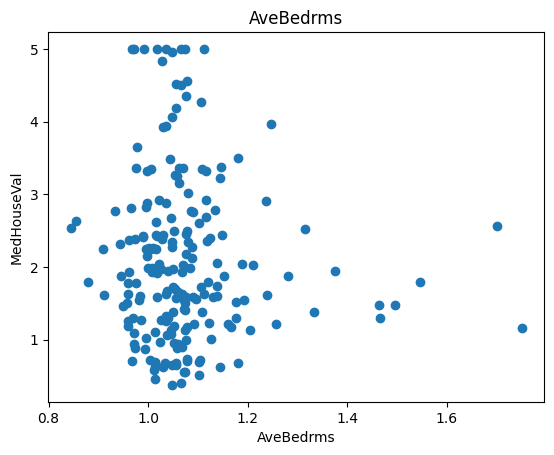

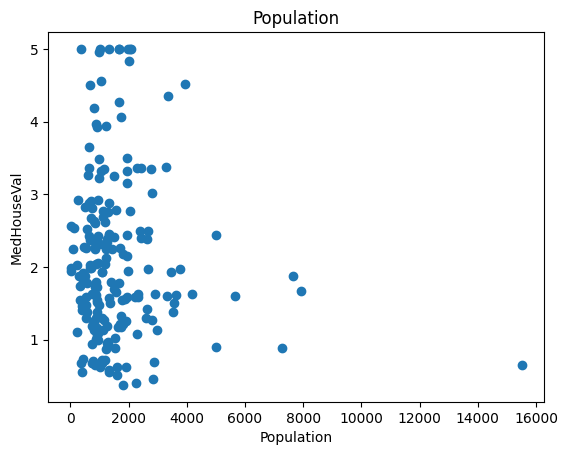

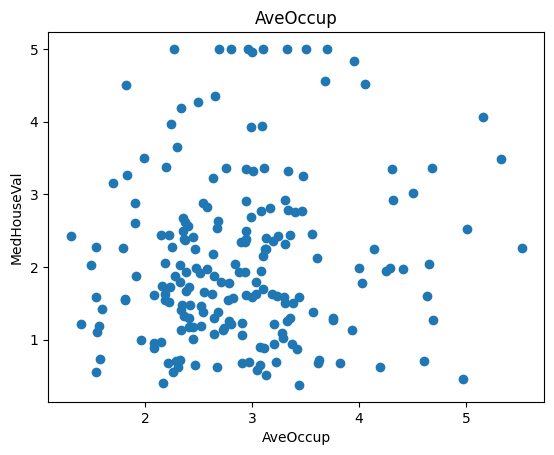

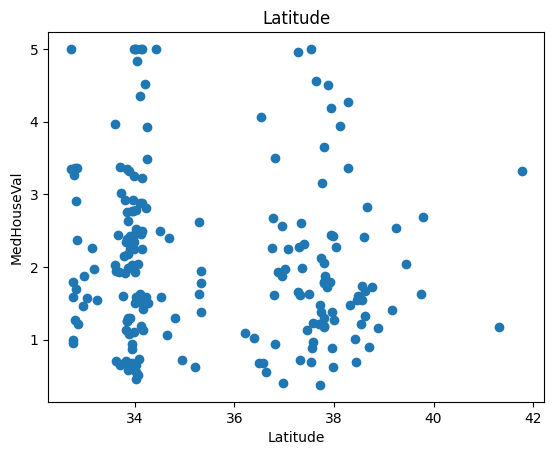

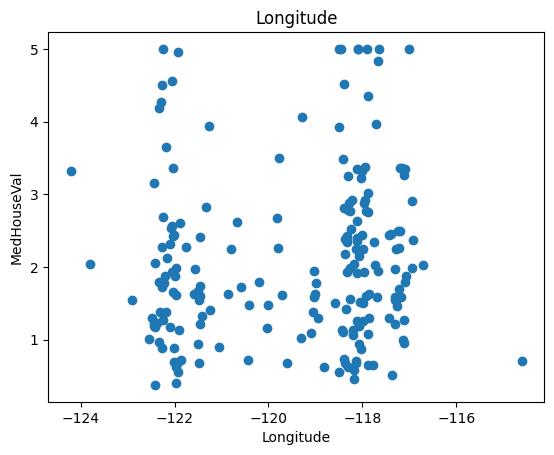

In [5]:
df_california_sample=df_california.sample(n=200)
target_df_sample=target_df.sample(n=200)
for label in df_california_sample.columns[1:]:
  plt.scatter(df_california_sample[label],target_df_sample)
  plt.linestyle='--'
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('MedHouseVal')
  plt.show()

In [66]:
df_california.corrwith(target_df['MedHouseVal']).sort_values()


,0
Latitude,-0.144160
AveBedrms,-0.046701
Longitude,-0.045967
Population,-0.024650
AveOccup,-0.023737
HouseAge,0.105623
AveRooms,0.151948
MedInc,0.688075


Train ,Valid and Test dataset

In [50]:
#
X_train, X_temp, y_train, y_temp = train_test_split(
    df_california, target_df, test_size=0.4, random_state=42
)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

In [51]:
print(X_train.shape ,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

(12384, 8) (12384, 1)
(4128, 8) (4128, 1)
(4128, 8) (4128, 1)


#Simple linear regression

In [70]:
X_train_simple=X_train[['MedInc']]
X_valid_simple=X_valid[['MedInc']]
X_test_simple=X_test[['MedInc']]

In [71]:
reg_simple_model=LinearRegression()
reg_simple_model.fit(X_train_simple,y_train)

LinearRegression()

In [72]:
y_reg_simple_pred=reg_simple_model.predict(X_valid_simple)

In [73]:
print(mean_squared_error(y_valid,y_reg_simple_pred))

0.7145000105761757


In [74]:
print("R² Score:", r2_score(y_valid, y_reg_simple_pred))

R² Score: 0.4526316215409414


#Multiple Linear regression

In [52]:
reg_model=LinearRegression()
reg_model.fit(X_train,y_train)

LinearRegression()

In [53]:
y_reg_pred=reg_model.predict(X_valid)

In [54]:
y_reg_pred

array([[1.75078724],
       [2.20342836],
       [1.88589861],
       ...,
       [1.06538367],
       [2.15339141],
       [1.24039439]])

In [56]:
y_valid


,MedHouseVal
5595,1.280
8046,1.866
3798,2.094
6659,1.731
9567,0.750
...,...
19969,0.446
1498,3.302
12725,1.157
18498,3.746


In [67]:
print(mean_squared_error(y_valid,y_reg_pred))
print("R² Score:", r2_score(y_valid, y_reg_pred))

0.5325643962848101
R² Score: 0.5920099290350325


In [58]:
y_reg_pred_test=reg_model.predict(X_test)
y_reg_pred_test

array([[1.95559411],
       [0.71139964],
       [2.39006649],
       ...,
       [3.68427896],
       [2.04136265],
       [1.99064837]])

In [68]:
print(mean_squared_error(y_test,y_reg_pred_test))
print("R² Score:", r2_score(y_test, y_reg_pred_test))

0.5546246533101031
R² Score: 0.5954968710766686


#Random forest Regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [63]:
y_pred_rfreg=rf_model.predict(X_valid)

In [64]:
print(mean_squared_error(y_valid,y_pred_rfreg))

0.26658422426445494


In [65]:
print("R² Score:", r2_score(y_valid, y_pred_rfreg))

R² Score: 0.7957735865661774
